Loading and Exploring AFL Match Data for Modelling

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mplfooty.pitch import Pitch

pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from expected_score_model.config import open_shots_file_path
# from total_points_model.domain.preprocessing.data_preprocessor import DataPreprocessor
# from total_points_model.domain.contracts.mappings import Mappings
# from total_points_model.domain.contracts.rolling_columns import RollingColumns
# from total_points_model.domain.contracts.modelling_data_contract import ModellingDataContract


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df_open_shots = pd.read_csv(open_shots_file_path)
df_open_shots.tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot
9211,211,kickIn,behind,1705.0,4,744,775.0,Sydney,Sydney,Tom Papley,Tom_Papley,Kick,56.0,-36.0,ineffective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,1,1,0,1,108.0,33.0,75.0,Kick,Gather,Kick,Handball Received,56.0,48.0,7.0,4.0,-36.0,-44.0,-47.0,-37.0,775.0,771.0,769.0,766.0,31.0,4.0,11.313708,24.0,36.0,43.266615,0.982794,56.309932,0.082503,4.727050,0.258900,14.833859,576.0,3.178054,False
9212,212,kickIn,goal,1740.0,4,787,900.0,Geelong,Geelong,Brandan Parfitt,Brandan_Parfitt,Kick,75.0,0.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,109.0,34.0,75.0,Kick,Handball Received,Handball,Loose Ball Get,75.0,75.0,76.0,75.0,0.0,-1.0,-5.0,-6.0,900.0,899.0,898.0,897.0,113.0,1.0,1.000000,5.0,0.0,5.000000,0.000000,0.000000,2.168022,124.218492,-1.429422,-81.899864,25.0,1.609438,False
9213,218,possGain,goal,1837.0,4,1136,1198.0,Geelong,Geelong,Sam De Koning,Sam_De_Koning,Kick,78.0,1.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,115.0,40.0,75.0,Kick,Gather,Kick,Handball Received,78.0,78.0,65.0,64.0,1.0,1.0,-12.0,-9.0,1198.0,1193.0,1190.0,1188.0,62.0,5.0,0.000000,2.0,1.0,2.236068,0.463648,26.565051,-2.442748,-139.959156,-0.440569,-25.242748,4.0,0.693147,False
9214,227,throwIn,goal,1901.0,4,1452,1458.0,Geelong,Geelong,Joel Selwood,Joel_Selwood,Kick,37.0,17.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,121.0,46.0,75.0,Kick,Gather,Knock On,Handball,37.0,37.0,43.0,34.0,17.0,19.0,20.0,25.0,1458.0,1457.0,1455.0,1453.0,6.0,1.0,2.000000,43.0,17.0,46.238512,0.376490,21.571307,0.129338,7.410516,0.403551,23.121747,1849.0,3.761200,False
9215,233,possGain,goal,1971.0,4,1744,1753.0,Sydney,Sydney,Tom Papley,Tom_Papley,Kick,48.0,-20.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,0,6,133.0,46.0,87.0,Kick,Bounce,Handball Received,Handball,48.0,38.0,35.0,37.0,-20.0,-31.0,-33.0,-37.0,1753.0,1752.0,1748.0,1747.0,9.0,1.0,14.866069,32.0,20.0,37.735925,0.558599,32.005383,0.144862,8.299977,0.461317,26.431498,1024.0,3.465736,False


Response Distribution

In [7]:
df_open_shots['Final_State'].value_counts(normalize=True)

goal      0.427951
behind    0.364800
miss      0.207248
Name: Final_State, dtype: float64

Shots on Pitch (Need to standardise all venues to same dimensions when plotting multiple games.)

In [8]:
match_shots = df_open_shots[df_open_shots['Match_ID'] == "2022F4_Geelong_Sydney"]
match_shots

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot
9196,4,possGain,miss,30.0,1,100,107.0,Geelong,Geelong,Mark Blicavs,Mark_Blicavs,Kick,60.0,-11.0,clanger,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,0,0,0,0,1.0,0.0,1.0,Kick,Gather,Contested Knock On,Kick Inside 50 Result,60.0,58.0,59.0,57.0,-11.0,-8.0,-4.0,1.0,107.0,106.0,104.0,102.0,7.0,1.0,3.605551,20.0,11.0,22.825424,0.502843,28.810794,0.250607,14.358720,0.895439,51.304867,400.0,2.995732,False
9197,23,throwIn,goal,146.0,1,545,546.0,Geelong,Geelong,Tom Hawkins,Tom_Hawkins,Kick,59.0,-10.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,1.0,0.0,1.0,Kick,Ruck Hard Ball Get,Out of Bounds,Kick,59.0,60.0,76.0,62.0,-10.0,-11.0,-17.0,36.0,546.0,545.0,524.0,521.0,1.0,1.0,1.414214,21.0,10.0,23.259407,0.444419,25.463345,0.253222,14.508540,0.898316,51.469696,441.0,3.044522,False
9198,38,throwIn,goal,280.0,1,878,879.0,Geelong,Geelong,Tom Hawkins,Tom_Hawkins,Kick,54.0,16.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,7.0,0.0,7.0,Kick,Ruck Hard Ball Get,Out of Bounds,Kick Inside 50 Result,54.0,54.0,68.0,65.0,16.0,18.0,34.0,35.0,879.0,878.0,857.0,855.0,1.0,1.0,2.000000,26.0,16.0,30.528675,0.551655,31.607502,0.180524,10.343276,0.594399,34.056550,676.0,3.258097,False
9199,41,possGain,goal,300.0,1,968,983.0,Sydney,Sydney,Will Hayward,Will_Hayward,Kick,56.0,7.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,0,6,13.0,0.0,13.0,Kick,Loose Ball Get Crumb,Kick Inside 50 Result,Kick Into F50,56.0,55.0,56.0,35.0,7.0,6.0,3.0,40.0,983.0,982.0,980.0,980.0,15.0,1.0,1.414214,24.0,7.0,25.000000,0.283794,16.260205,0.249854,14.315557,0.864800,49.549387,576.0,3.178054,False
9200,43,centreBounce,goal,329.0,1,1141,1159.0,Geelong,Geelong,Isaac Smith,Isaac_Smith,Kick,61.0,13.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,19.0,6.0,13.0,Kick,Loose Ball Get,Spoil,Contest Target,61.0,58.0,46.0,46.0,13.0,17.0,18.0,18.0,1159.0,1158.0,1157.0,1155.0,18.0,1.0,5.000000,19.0,13.0,23.021729,0.600050,34.380345,0.233954,13.404584,0.833181,47.737759,361.0,2.944439,False
9201,48,possGain,goal,381.0,1,1267,1295.0,Geelong,Geelong,Isaac Smith,Isaac_Smith,Kick,51.0,-4.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,25.0,6.0,19.0,Kick,Handball Received,Handball,Handball Received,51.0,44.0,39.0,37.0,-4.0,0.0,4.0,5.0,1295.0,1293.0,1292.0,1291.0,28.0,2.0,8.062258,29.0,4.0,29.274562,0.137066,7.853313,0.219188,12.558572,0.727995,41.711064,841.0,3.367296,False
9202,56,throwIn,behind,448.0,1,1533,1545.0,Geelong,Geelong,Gryan Miers,Gryan_Miers,Kick,68.0,29.0,ineffective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,0,1,1,1,0,31.0,6.0,25.0,Kick,Loose Ball Get Crumb,Spoil,Contest Target,68.0,66.0,66.0,66.0,29.0,28.0,23.0,23.0,1545.0,1544.0,1543.0,1541.0,12.0,1.0,2.236068,12.0,29.0,31.384710,1.178456,67.520566,0.078789,4.514256,0.258053,14.785345,144.0,2.484907,False
9203,71,centreBounce,behind,551.0,2,0,26.0,Sydney,Sydney,Lance Franklin,Lance_Franklin,Kick,69.0,-19.0,inef

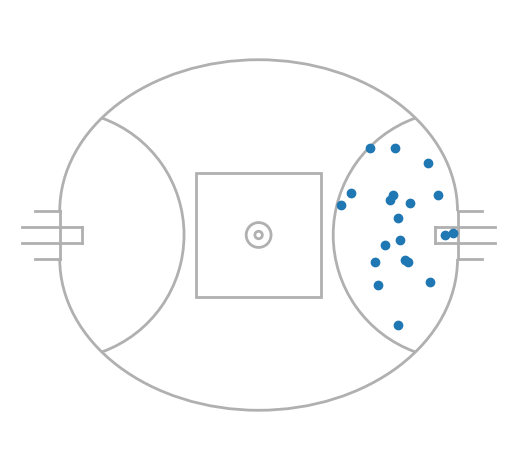

In [9]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160)
fig, ax = pitch.draw()
pitch.scatter(match_shots['x'], match_shots['y'], ax=ax)

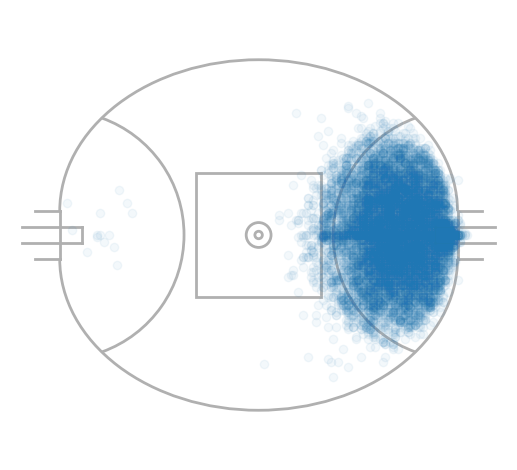

In [10]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160)
fig, ax = pitch.draw()
pitch.scatter(df_open_shots['x'], df_open_shots['y'], ax=ax, alpha=0.05)

Goals

In [11]:
df_goals = df_open_shots[df_open_shots['Goal']==1]
df_goals.shape

(3868, 64)

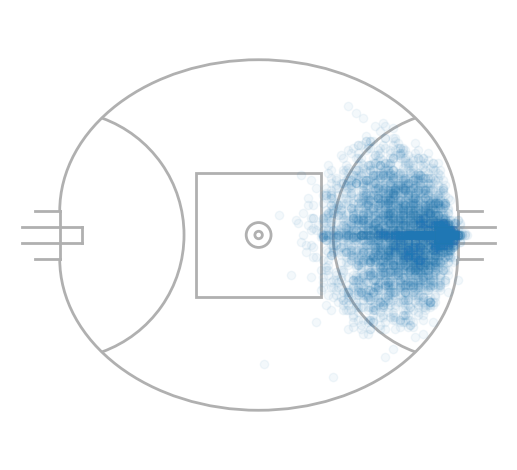

In [12]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160)
fig, ax = pitch.draw()
pitch.scatter(df_goals['x'], df_goals['y'], ax=ax, alpha=0.05)

In [13]:
df_open_shots[df_open_shots['y'] == 0].tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot
9183,148,possGain,goal,1085.0,3,757,761.0,Sydney,Sydney,Justin McInerney,Justin_McInerney,Kick,66.0,0.0,effective,True,NaN,136,155,Sydney,Collingwood,right,2022F3_Sydney_Collingwood,2022F3,2022,1,0,6,6,0,79.0,52.0,27.0,Kick,Bounce,Bounce,Uncontested Mark,66.0,41.0,35.0,19.0,0.0,-1.0,-1.0,0.0,761.0,759.0,758.0,757.0,4.0,2.0,25.019992,11.5,0.0,11.5,0.0,0.0,0.603229,34.562490,5.507608,315.562687,132.25,2.442347,False
9185,155,ballUp,miss,1155.0,3,1047,1052.0,Collingwood,Collingwood,Brody Mihocek,Brody_Mihocek,Kick,20.0,0.0,ineffective,True,NaN,136,155,Sydney,Collingwood,right,2022F3_Sydney_Collingwood,2022F3,2022,0,1,1,0,1,86.0,52.0,34.0,Kick,Loose Ball Get Crumb,Spoil,Contest Target,20.0,11.0,10.0,10.0,0.0,0.0,-5.0,-5.0,1052.0,1051.0,1050.0,1048.0,5.0,1.0,9.000000,57.5,0.0,57.5,0.0,0.0,0.111650,6.397082,0.343488,19.680389,3306.25,4.051785,False
9186,157,throwIn,goal,1164.0,3,1087,1090.0,Collingwood,Collingwood,Josh Daicos,Josh_Daicos,Kick,42.0,0.0,effective,True,NaN,136,155,Sydney,Collingwood,right,2022F3_Sydney_Collingwood,2022F3,2022,1,0,6,0,6,86.0,53.0,33.0,Kick,Gather From Hitout,Out of Bounds,Kick,42.0,46.0,-67.0,-71.0,0.0,-13.0,34.0,11.0,1090.0,1087.0,1066.0,1064.0,3.0,3.0,13.601471,35.5,0.0,35.5,0.0,0.0,0.181759,10.413998,0.583517,33.433043,1260.25,3.569533,False
9194,238,possGain,goal,1772.0,4,1502,1517.0,Collingwood,Collingwood,Will Hoskin-Elliott,Will_Hoskin-Elliott,Kick,41.0,0.0,effective,True,NaN,136,155,Sydney,Collingwood,right,2022F3_Sydney_Collingwood,2022F3,2022,1,0,6,0,6,96.0,82.0,14.0,Kick,Hard Ball Get,Kick Inside 50 Result,Kick Into F50,41.0,45.0,45.0,23.0,0.0,-9.0,-9.0,29.0,1517.0,1514.0,1511.0,1510.0,15.0,3.0,9.848858,36.5,0.0,36.5,0.0,0.0,0.176701,10.124200,0.565120,32.379007,1332.25,3.597312,False
9212,212,kickIn,goal,1740.0,4,787,900.0,Geelong,Geelong,Brandan Parfitt,Brandan_Parfitt,Kick,75.0,0.0,effective,True,NaN,141,160,Geelong,Sydney,left,2022F4_Geelong_Sydney,2022F4,2022,1,0,6,6,0,109.0,34.0,75.0,Kick,Handball Received,Handball,Loose Ball Get,75.0,75.0,76.0,75.0,0.0,-1.0,-5.0,-6.0,900.0,899.0,898.0,897.0,113.0,1.0,1.000000,5.0,0.0,5.0,0.0,0.0,2.168022,124.218492,-1.429422,-81.899864,25.00,1.609438,False


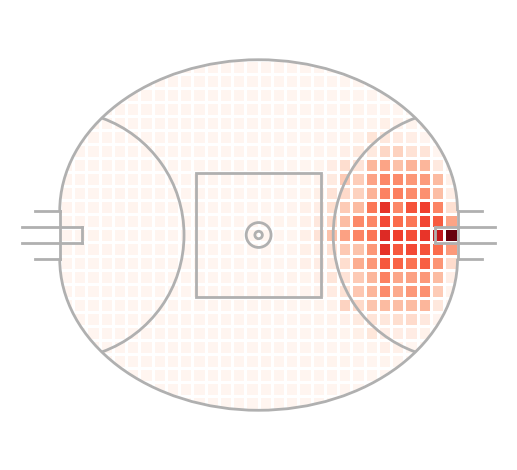

In [14]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160, line_zorder=2)
fig, ax = pitch.draw()
stats = pitch.bin_statistic(df_open_shots['x'], df_open_shots['y'], bins=(30, 25))
pitch.heatmap(stats, edgecolors="white", cmap="Reds", ax=ax)

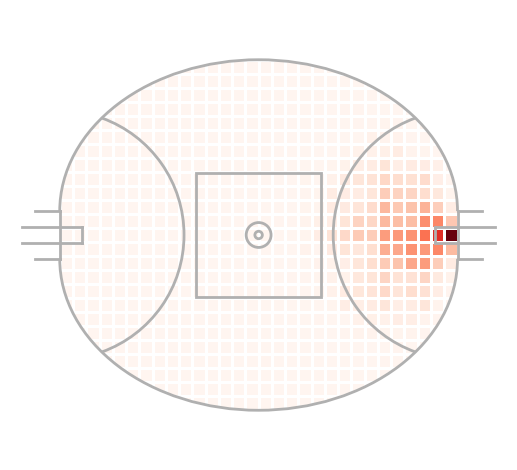

In [15]:
# Plot pitch
pitch = Pitch(pitch_width=141, pitch_length=160, line_zorder=2)
fig, ax = pitch.draw()
stats = pitch.bin_statistic(df_goals['x'], df_goals['y'], bins=(30, 25))
pitch.heatmap(stats, edgecolors="white", cmap="Reds", ax=ax)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<Axes: >

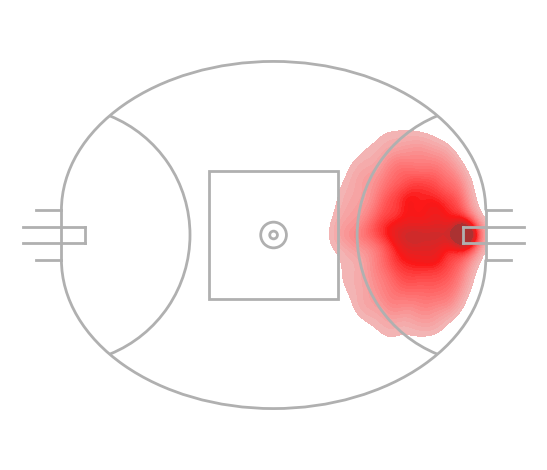

In [16]:
# Plot pitch
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2)
fig, ax = pitch.draw()
pitch.kdeplot(df_open_shots['x'], df_open_shots['y'], ax=ax, fill = True, color = "red", levels=30)

<Axes: >

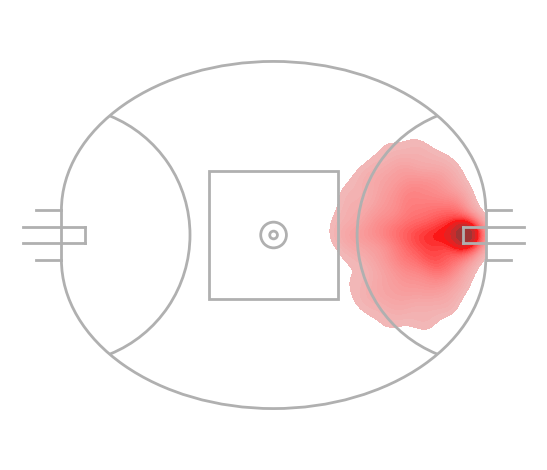

In [17]:
# Plot pitch
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2)
fig, ax = pitch.draw()
pitch.kdeplot(df_goals['x'], df_goals['y'], ax=ax, fill = True, color = "red", levels=30)

Exploration Functions

In [18]:
def _get_feature_plot_data(data, response, feature):
    
    from pandas.api.types import is_numeric_dtype
    
    plot_dict = {
    'actual':data[response],
    'feature':data[feature]
    }
    plot_data = pd.DataFrame(plot_dict)

    if is_numeric_dtype(plot_data['feature']) & (len(np.unique(plot_data['feature'])) > 50):
        bins = 10
        edges = np.linspace(plot_data['feature'].min(), plot_data['feature'].max(), bins+1).astype(float).round(3)
        labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]
        plot_data['feature'] = pd.qcut(plot_data['feature'], q= bins, labels = labels)
        
    feature_plot_data = plot_data.groupby('feature').agg(
        actual = ('actual', 'mean'),
        exposure = ('actual', 'size'),
        ).reset_index()
    
    feature_plot_data['relative'] = feature_plot_data['actual'] / data[response].mean()
    
    return feature_plot_data.sort_values(by = 'feature')

In [19]:
def plot_feature(data, response, feature):
    
    import matplotlib.pyplot as plt
    
    feature_plot_data = _get_feature_plot_data(data, response, feature)

    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()

    ax1.bar(feature_plot_data['feature'],feature_plot_data['exposure'], alpha = 0.5)
    ax2.plot(feature_plot_data['feature'], feature_plot_data['actual'], label = "Actual", color = "r")
    ax2.axhline(y = data[response].mean(), color = 'green', linestyle = '-')

    ax1.set_xlabel(feature)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
        
    ax1.set_ylabel("Exposure", fontsize=14)
    ax2.set_ylabel(response, fontsize=14)

    ax2.legend()

    fig.suptitle("Actual: " + feature, fontsize=20)
    fig.show()

One Way Averages

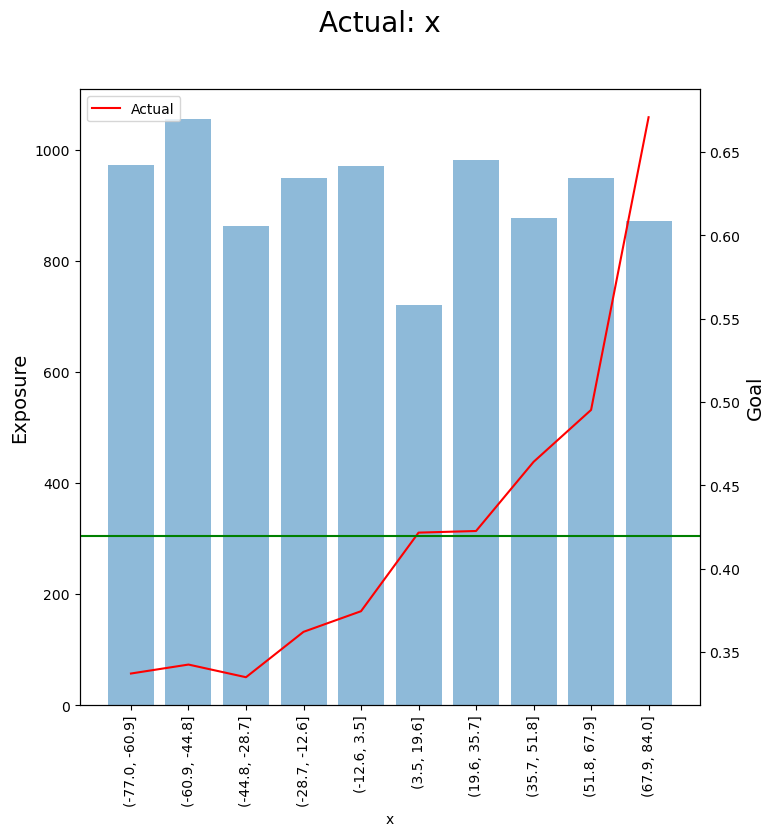

In [20]:
plot_feature(df_open_shots, "Goal", "x")

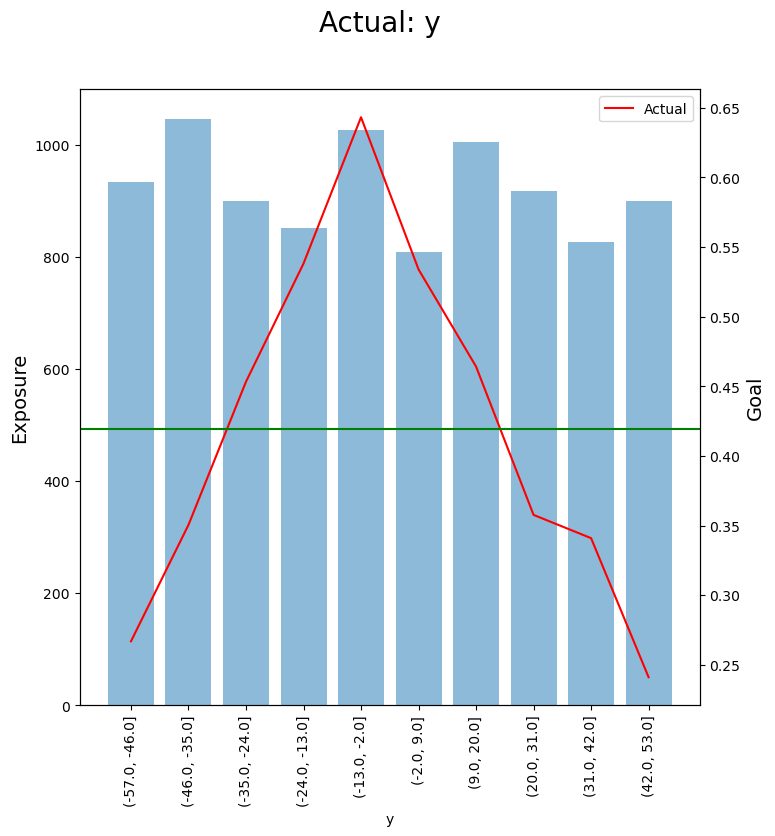

In [22]:
plot_feature(df_open_shots, "Goal", "y")

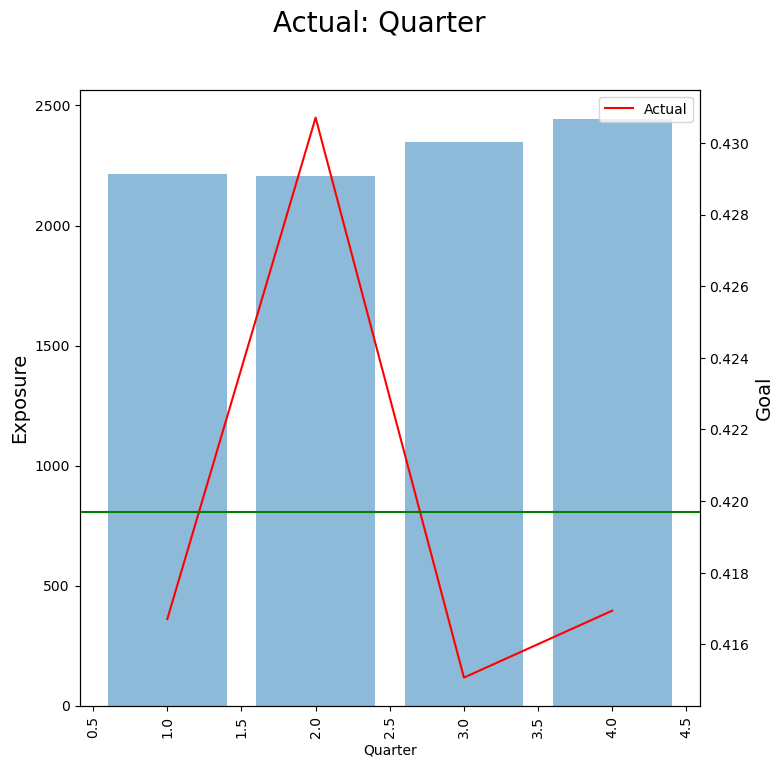

In [23]:
plot_feature(df_open_shots, "Goal", "Quarter")

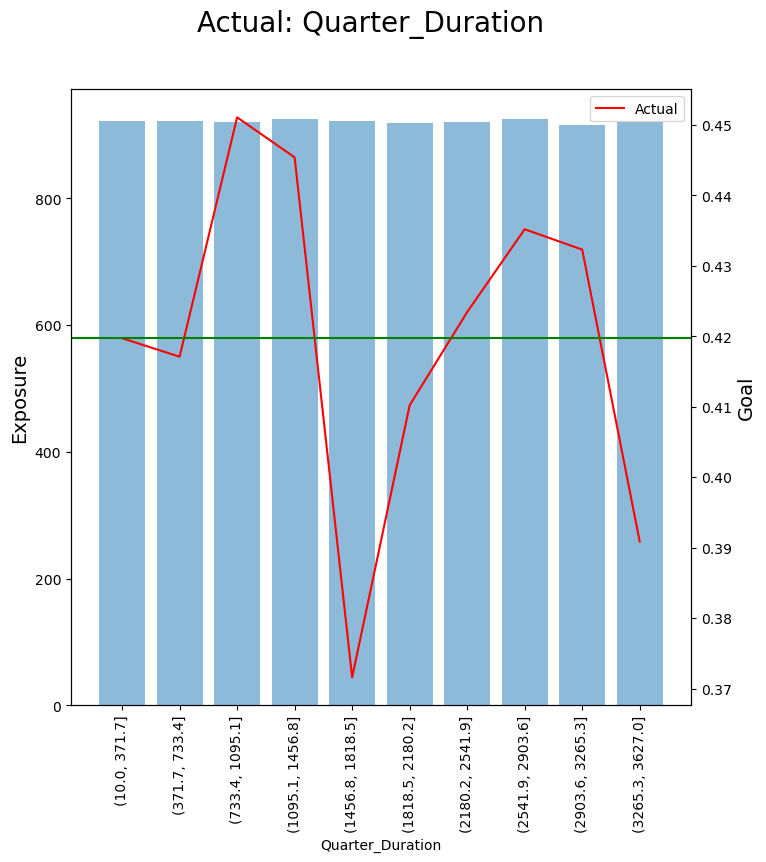

In [24]:
plot_feature(df_open_shots, "Goal", "Quarter_Duration")

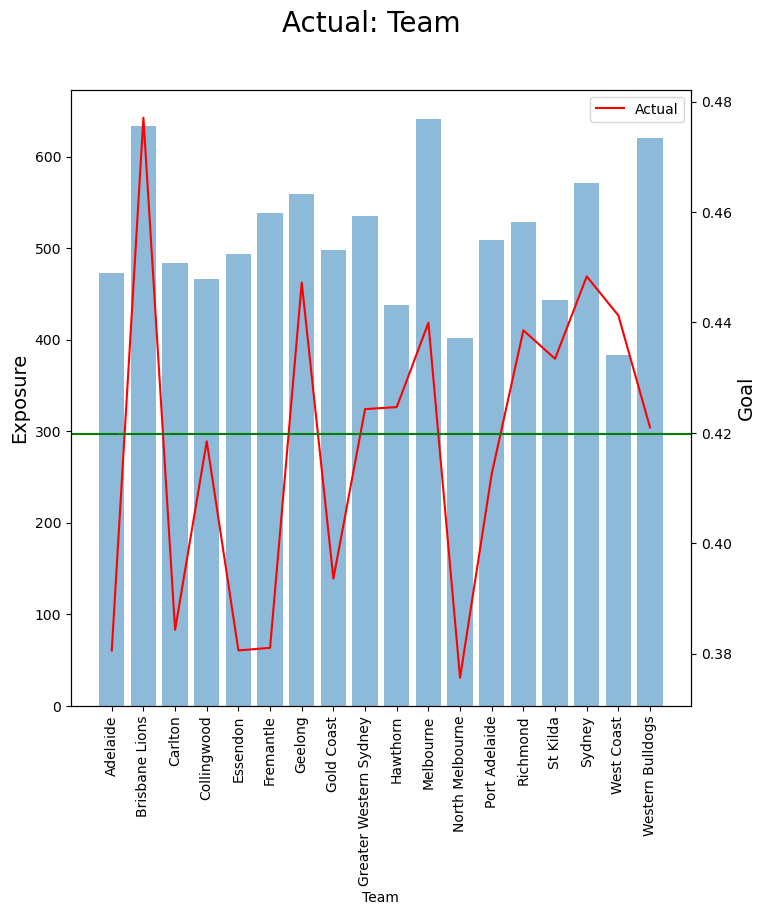

In [25]:
plot_feature(df_open_shots, "Goal", "Team")

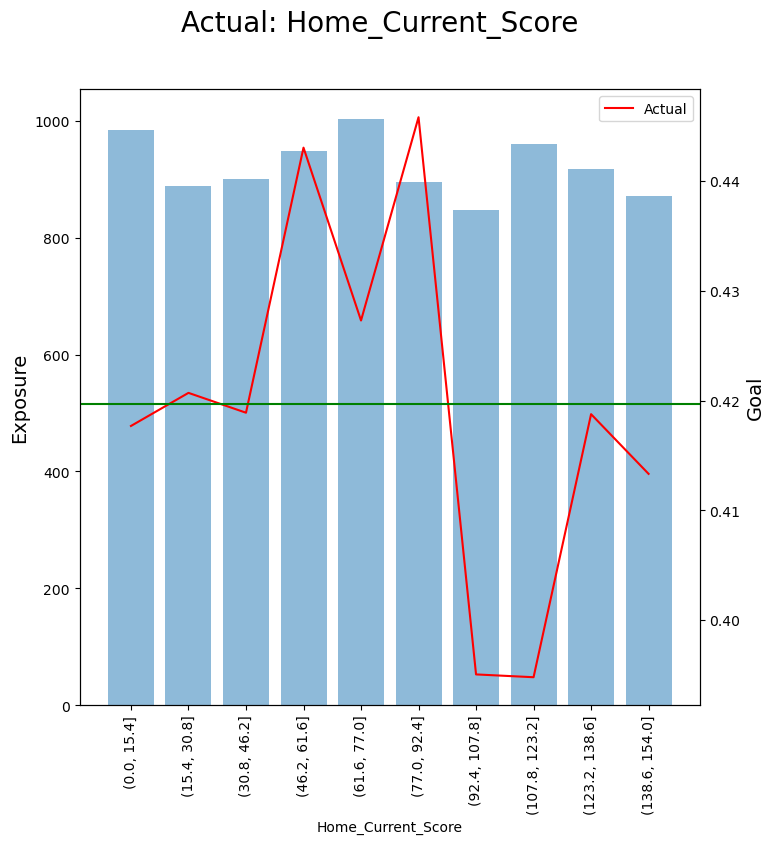

In [26]:
plot_feature(df_open_shots, "Goal", "Home_Current_Score")

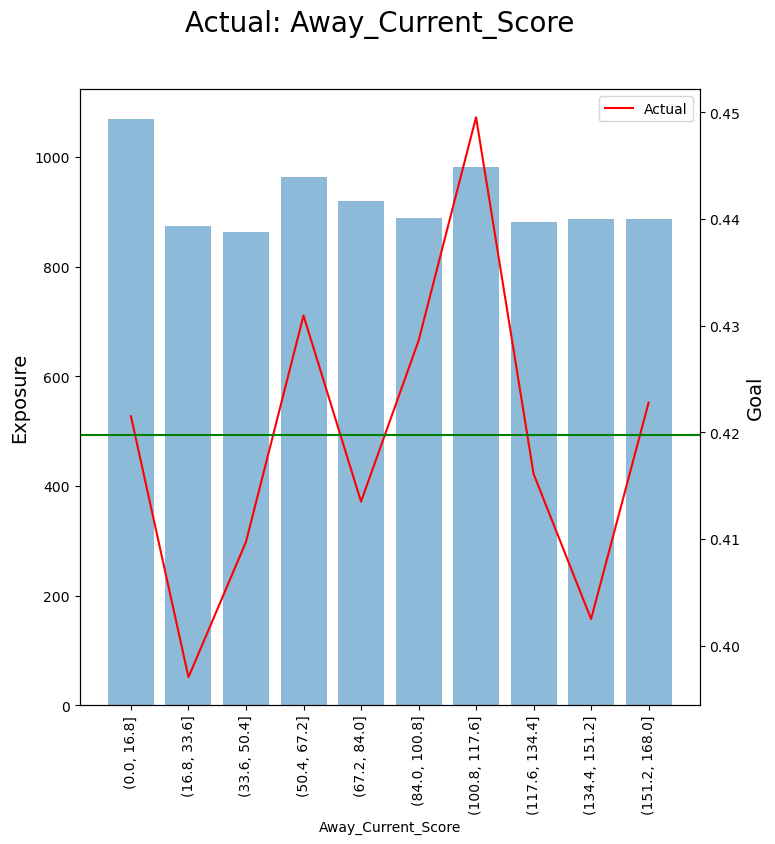

In [27]:
plot_feature(df_open_shots, "Goal", "Away_Current_Score")

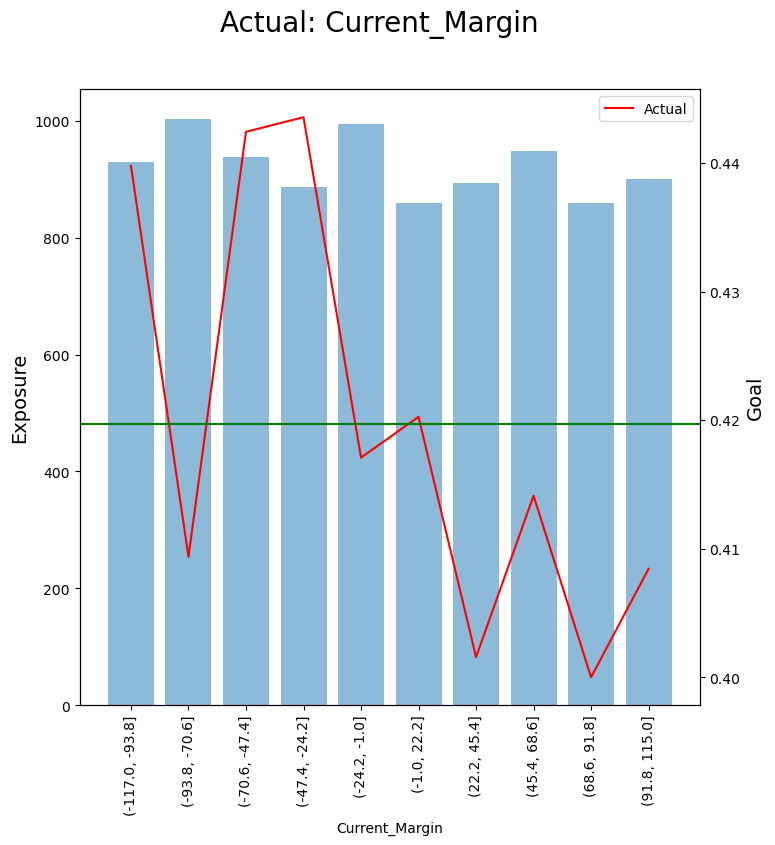

In [28]:
plot_feature(df_open_shots, "Goal", "Current_Margin")

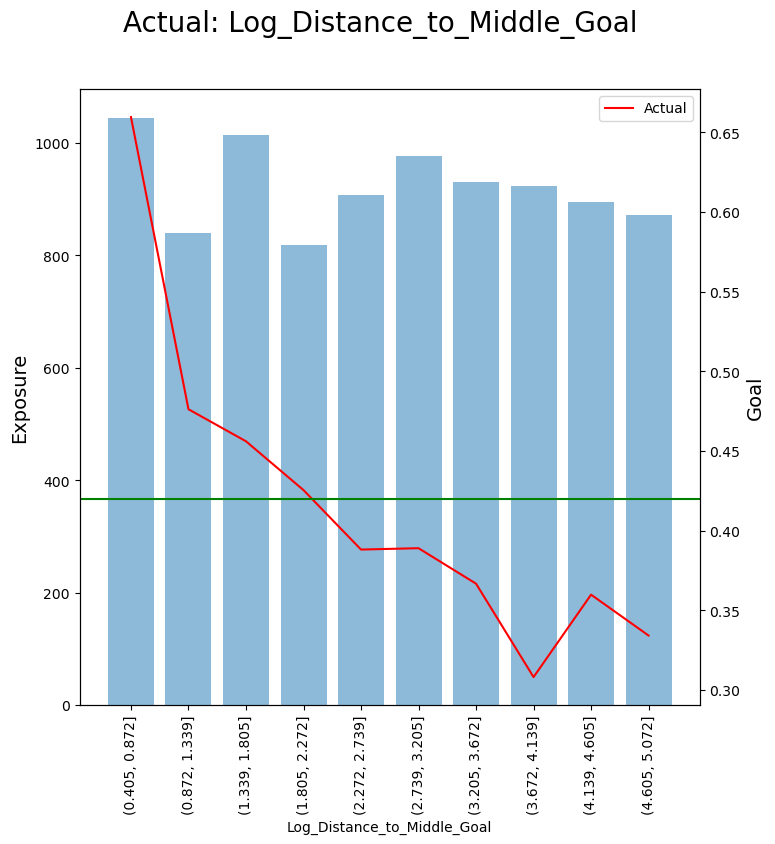

In [29]:
plot_feature(df_open_shots, "Goal", "Log_Distance_to_Middle_Goal")

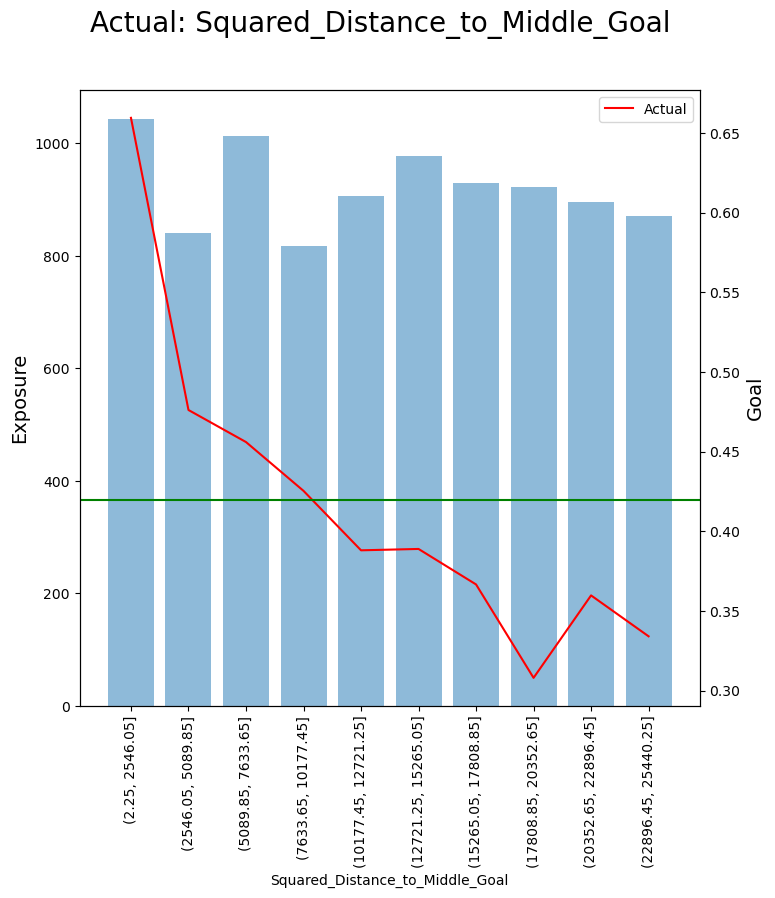

In [30]:
plot_feature(df_open_shots, "Goal", "Squared_Distance_to_Middle_Goal")

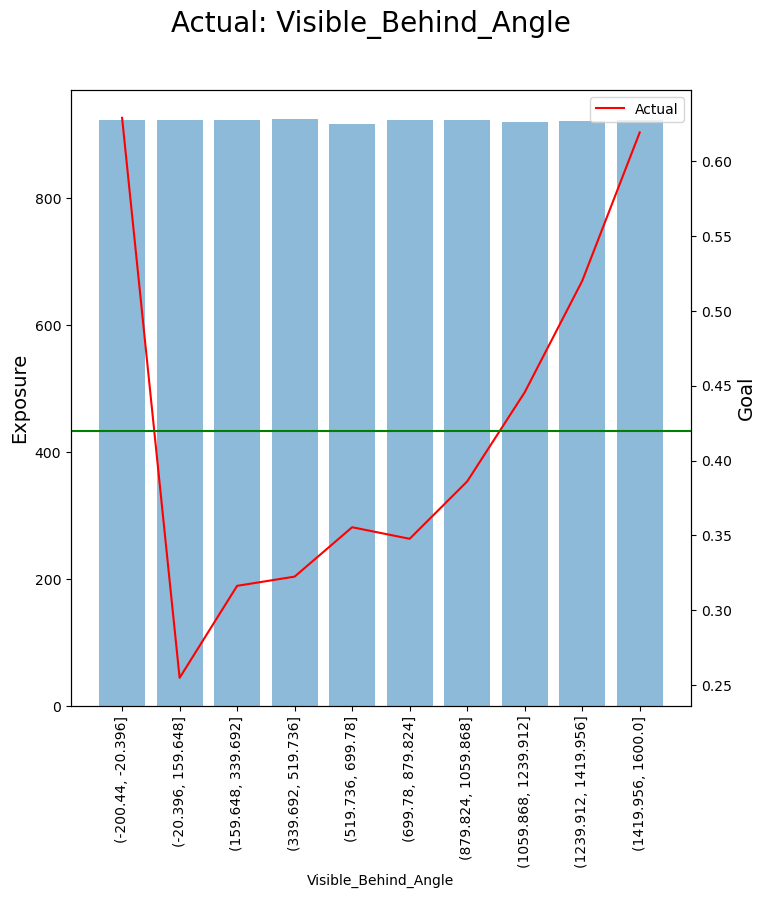

In [31]:
plot_feature(df_open_shots, "Goal", "Visible_Behind_Angle")

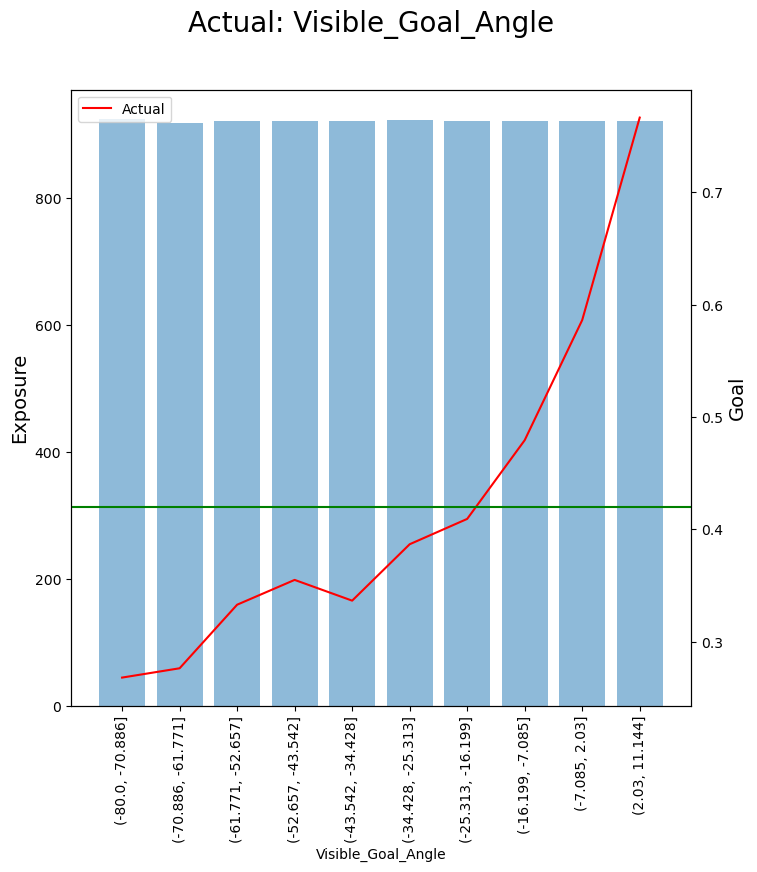

In [32]:
plot_feature(df_open_shots, "Goal", "Visible_Goal_Angle")

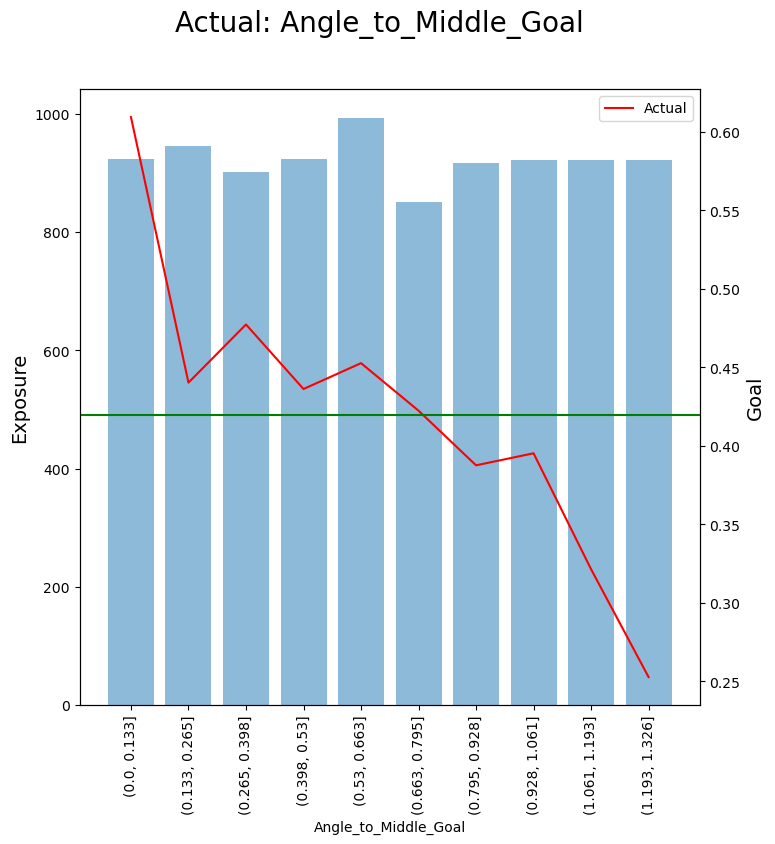

In [33]:
plot_feature(df_open_shots, "Goal", "Angle_to_Middle_Goal")

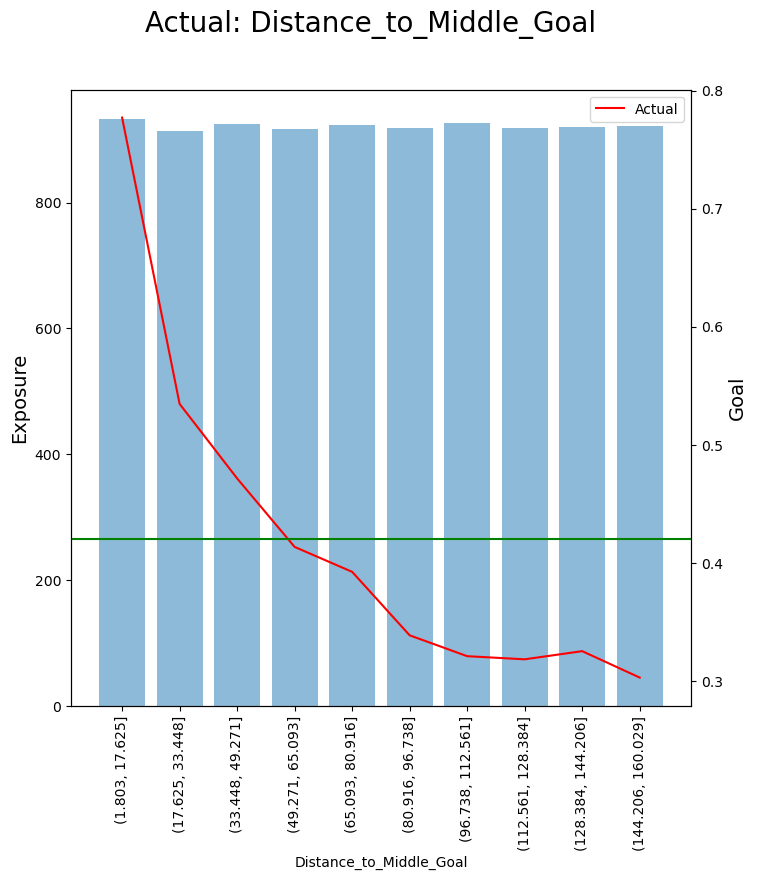

In [34]:
plot_feature(df_open_shots, "Goal", "Distance_to_Middle_Goal")

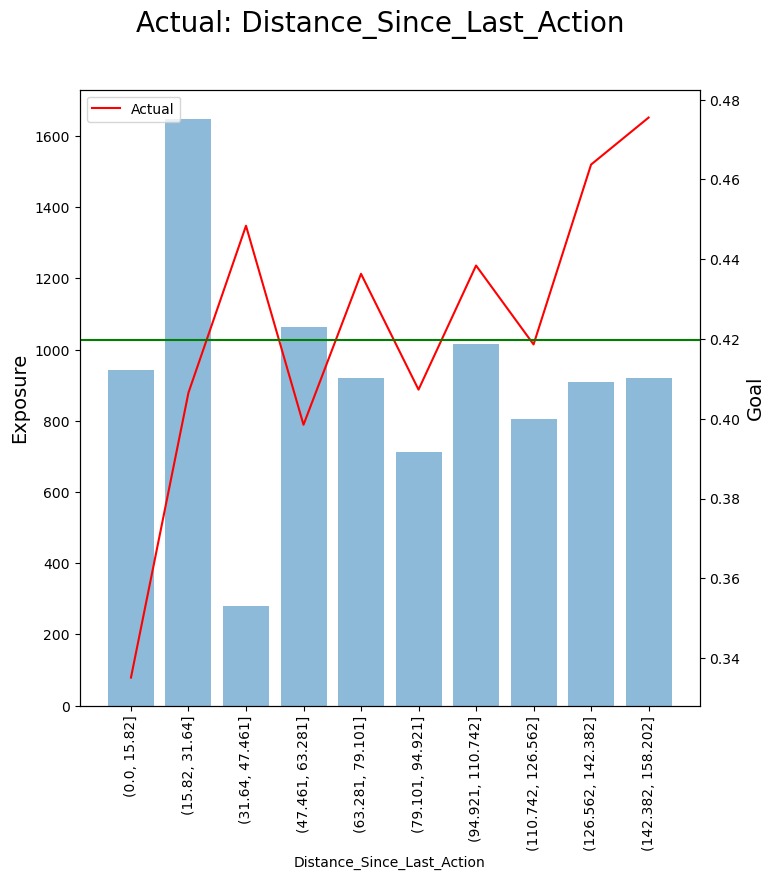

In [35]:
plot_feature(df_open_shots, "Goal", "Distance_Since_Last_Action")

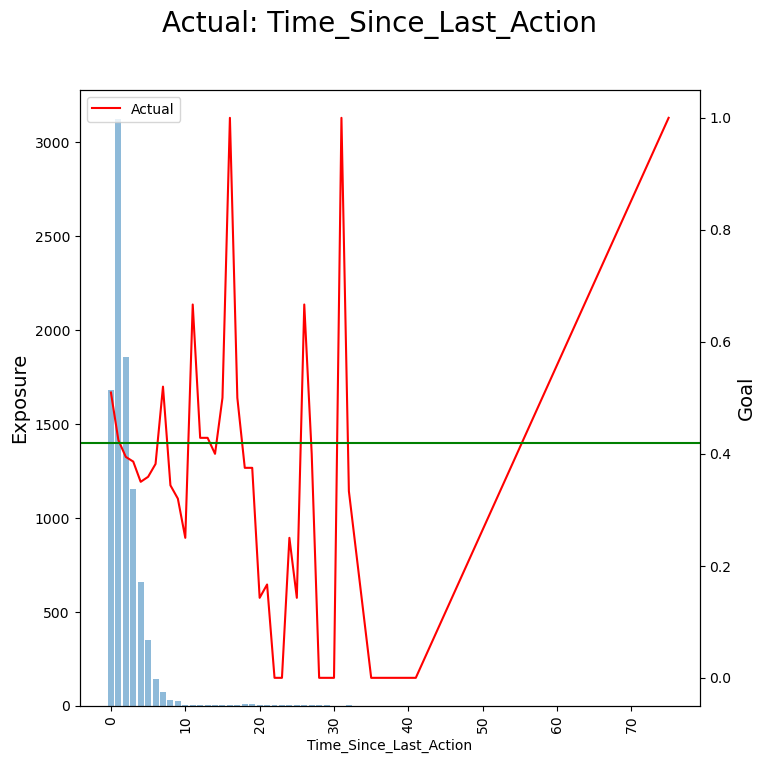

In [36]:
plot_feature(df_open_shots, "Goal", "Time_Since_Last_Action")

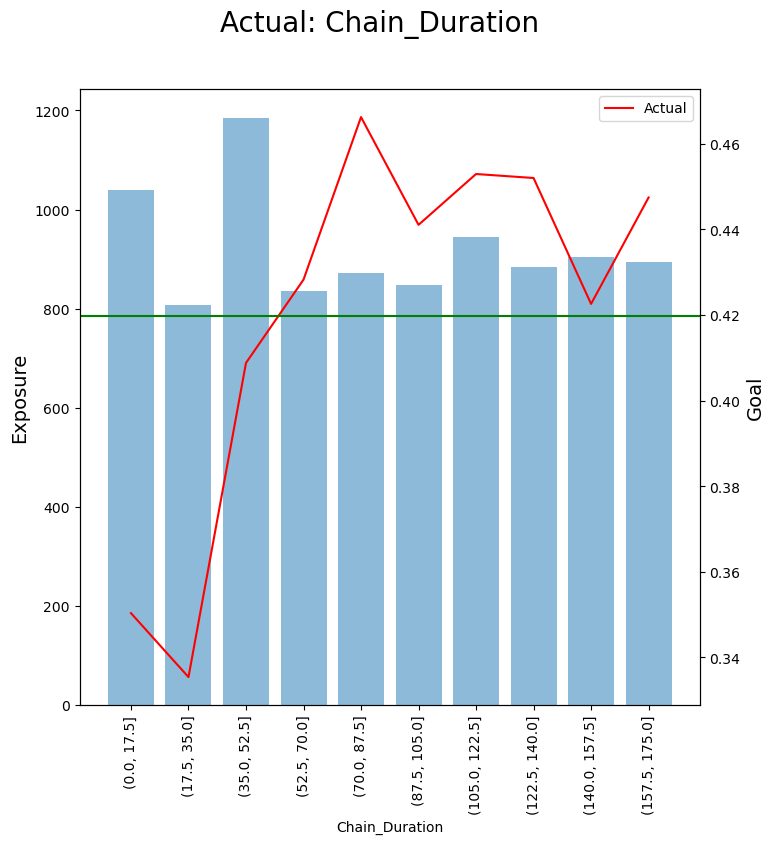

In [37]:
plot_feature(df_open_shots, "Goal", "Chain_Duration")

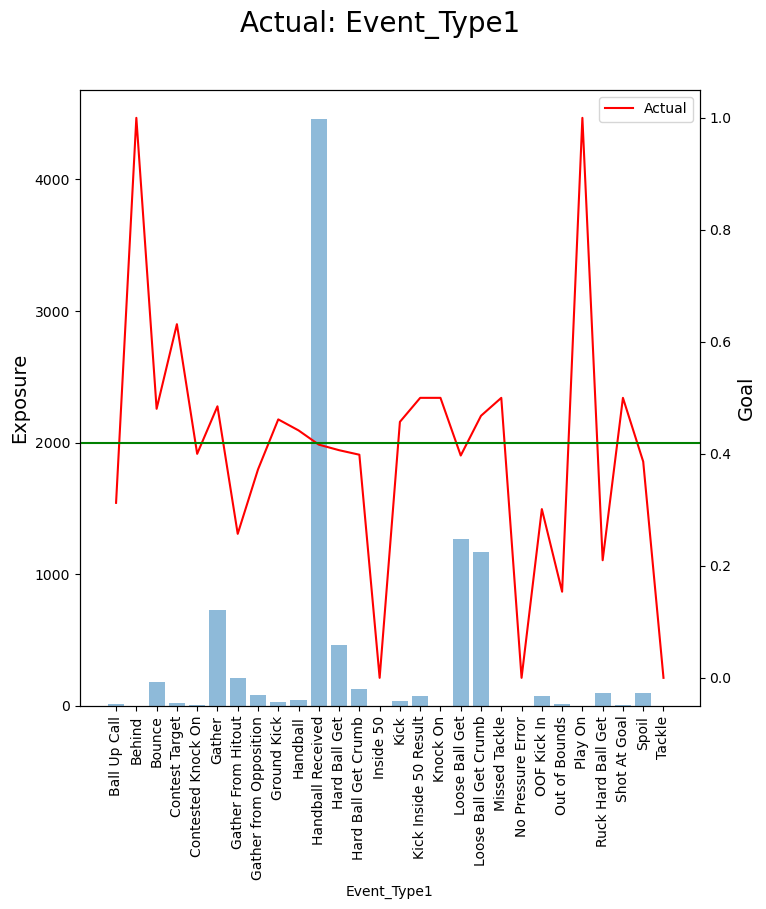

In [38]:
plot_feature(df_open_shots, "Goal", "Event_Type1")

Plot Two Way Averages

In [27]:
def _get_two_way_feature_plot_data(data, response, xaxis_feature, yaxis_feature):
    
    from pandas.api.types import is_numeric_dtype
    
    plot_dict = {
    'actual':data[response],
    'xaxis_feature':data[xaxis_feature],
    'yaxis_feature':data[yaxis_feature]
    }
    plot_data = pd.DataFrame(plot_dict)
    
    if is_numeric_dtype(plot_data['xaxis_feature']) & (len(np.unique(plot_data['xaxis_feature'])) > 50):
            bins = 10
            edges = np.linspace(plot_data['xaxis_feature'].min(), plot_data['xaxis_feature'].max(), bins+1).astype(float)
            labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]
            plot_data['xaxis_feature'] = pd.cut(plot_data['xaxis_feature'], bins = bins, labels = labels)
            
    if is_numeric_dtype(plot_data['yaxis_feature']) & (len(np.unique(plot_data['yaxis_feature'])) > 50):
            bins = 10
            edges = np.linspace(plot_data['yaxis_feature'].min(), plot_data['yaxis_feature'].max(), bins+1).astype(float)
            labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]
            plot_data['yaxis_feature'] = pd.cut(plot_data['yaxis_feature'], bins = bins, labels = labels)
            
    feature_plot_data = plot_data.groupby(['xaxis_feature', 'yaxis_feature']).agg(
            actual = ('actual', 'mean'),
            exposure = ('actual', 'size'),
            ).reset_index()
    
    return feature_plot_data.sort_values(by='xaxis_feature')

In [28]:
def plot_two_way_feature(data, response, xaxis_feature, yaxis_feature):
    
    import plotly
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    feature_plot_data = _get_two_way_feature_plot_data(data, response, xaxis_feature, yaxis_feature)
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    plotly_default_colours = plotly.colors.qualitative.Plotly
    unique_levels = list(feature_plot_data['yaxis_feature'].unique())

    for index in range(len(unique_levels)):
        level_data = feature_plot_data[feature_plot_data['yaxis_feature'] == unique_levels[index]]
        # Add traces
        fig.add_trace(
            go.Bar(x=level_data['xaxis_feature'], y=level_data['exposure'], 
                name=str(unique_levels[index]),
                opacity = 0.5,
                marker_color = plotly_default_colours[index]),
            secondary_y=False,
        )
    for index in range(len(unique_levels)):
        level_data = feature_plot_data[feature_plot_data['yaxis_feature'] == unique_levels[index]]
        fig.add_trace(
            go.Scatter(x=level_data['xaxis_feature'], y=level_data['actual'], 
                    name=str(unique_levels[index]),
                    marker_color = plotly_default_colours[index]),
            secondary_y=True,
        )

    # Add figure title
    fig.update_layout(
        title_text="Two Way AvE: " + xaxis_feature + " x " + yaxis_feature,
        width = 1000,
        height = 600,
        barmode = "group"
    )

    # Set x-axis title
    fig.update_xaxes(title_text=xaxis_feature)

    # Set y-axes titles
    fig.update_yaxes(title_text="Exposure", secondary_y=False)
    fig.update_yaxes(title_text=response, secondary_y=True)

    fig.show()

In [31]:
plot_two_way_feature(df_open_shots, "Goal", "x", "Year")